<a href="https://colab.research.google.com/github/dasdasqs2/Machine-learning/blob/main/wk8_0422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(42)

In [90]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [91]:
red['type'] = 0
white['type'] = 1
# mean의 의미-> red:white = 1:3

print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe()) #통계적 특징

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

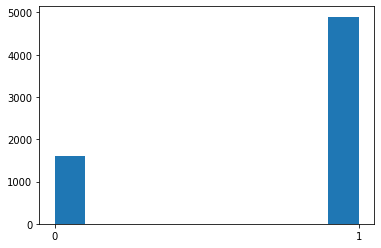

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
4893    1
4894    1
4895    1
4896    1
4897    1
Name: type, Length: 6497, dtype: int64>


In [92]:
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts)

In [93]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [94]:
# 정규화 정규화 (0~1 사이의 값을 가짐.)
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [95]:
wine_shuffle = wine_norm.sample(frac=1) # frac: 몇 퍼센트 suffle 할 것인지, '1' = 100%
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
4299       0.206612          0.133333     0.180723  ...  0.202899  0.500000   1.0
2321       0.066116          0.243333     0.000000  ...  0.318841  0.333333   1.0
178        0.264463          0.483333     0.000000  ...  0.231884  0.333333   0.0
374        0.842975          0.220000     0.379518  ...  0.405797  0.500000   0.0
4068       0.272727          0.240000     0.162651  ...  0.550725  0.500000   1.0

[5 rows x 13 columns]
[[0.20661157 0.13333333 0.18072289 0.09202454 0.33056478 0.20486111
  0.34101382 0.14786967 0.29457364 0.1011236  0.20289855 0.5
  1.        ]
 [0.0661157  0.24333333 0.         0.01226994 0.0730897  0.03472222
  0.39631336 0.13784461 0.82945736 0.18539326 0.31884058 0.33333333
  1.        ]
 [0.26446281 0.48333333 0.         0.0291411  0.09800664 0.02083333
  0.03225806 0.18874108 0.58914729 0.19101124 0.23188406 0.33333333
  0.        ]
 [0.84297521 0.22       0.37951807 0.04907

In [96]:
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])


[0.20661157 0.13333333 0.18072289 0.09202454 0.33056478 0.20486111
 0.34101382 0.14786967 0.29457364 0.1011236  0.20289855 0.5       ]
1.0
[0.34710744 0.43       0.14457831 0.03374233 0.12292359 0.03125
 0.12903226 0.18777714 0.48837209 0.19101124 0.28985507 0.5       ]
0.0
[0. 1.]
[1. 0.]


In [97]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_37 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_38 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8243 - val_loss: 0.0611 - val_accuracy: 0.9938
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9770 - val_loss: 0.0814 - val_accuracy: 0.9923
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9777 - val_loss: 0.0497 - val_accuracy: 0.9946
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9802 - val_loss: 0.0570 - val_accuracy: 0.9915
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9897 - val_loss: 0.0391 - val_accuracy: 0.9954
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9891 - val_loss: 0.0966 - val_accuracy: 0.9869
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9795 - val_loss: 0.0393 - val_accuracy: 0.9946
Epoch 

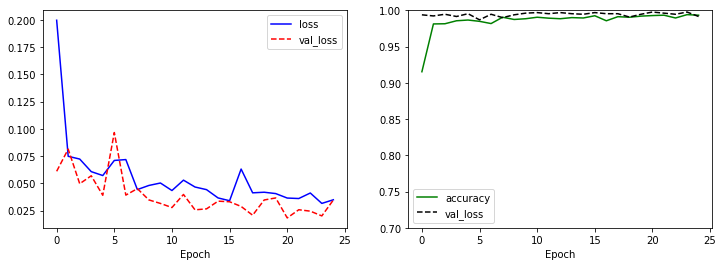

In [99]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [100]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9900


[0.03357163816690445, 0.9900000095367432]

In [101]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


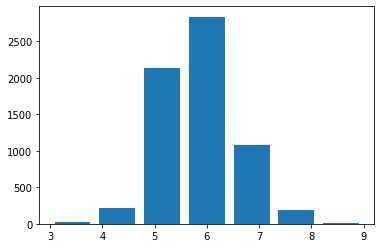

In [102]:
# imbalanced data : ex) medical_data
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [103]:
# label 지정
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2 

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [104]:
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [106]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25,batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.5277 - accuracy: 0.7638 - val_loss: 0.4296 - val_accuracy: 0.7954
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8008 - val_loss: 0.4139 - val_accuracy: 0.7954
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7939 - val_loss: 0.4397 - val_accuracy: 0.7954
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8131 - val_loss: 0.4614 - val_accuracy: 0.7954
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8126 - val_loss: 0.4179 - val_accuracy: 0.7954
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8059 - val_loss: 0.4063 - val_accuracy: 0.8038
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8057 - val_loss: 0.4082 - val_accuracy: 0.8269
Epoch 

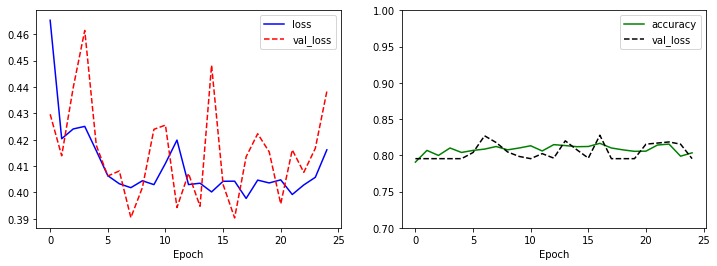

In [107]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [108]:
model.evaluate(test_X,test_Y)

41/41 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8115


[0.4087374210357666, 0.8115384578704834]